In [1]:
setwd('E:/notebook/miMatch')
library(plyr) 
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(dplyr)
library(reshape2)
library(VennDiagram)
library(RColorBrewer)
library(repr)

Warning message:
"package 'plyr' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks ggpubr::mutate(

In [2]:
metadata<-read.csv("Temp/IBDmetadata.csv",stringsAsFactors = F)
microdata<-read.csv("Temp/IBDmicrodata.csv",row.names = 1,stringsAsFactors = F)
microdata<-as.data.frame(t(na.omit(t(microdata)))) 
PSMlabel<-read.csv("Temp/IBDMatchedLabel.csv",stringsAsFactors = F)  
metadata2<-read.csv("Temp/IBDMatchedMetadata.csv",stringsAsFactors = F)
metadata1<-rbind(metadata[which(metadata$study_condition=="control"),c(2,6)],
                 metadata[which(metadata$study_condition=="IBD"),c(2,6)])
head(PSMlabel)

,Case,Control
,<chr>,<chr>
1,SKST006_6_G102964,SKST007_6_G102995
2,SKST006_6_G102964,SKST010_1_G102968
3,SKST006_6_G102964,SKST041_3_G103028
4,SKST006_7_G102965,SKST037_2_G103023
5,SKST006_7_G102965,p9223_mo6
6,SKST006_7_G102965,p9281_mo5


In [3]:
microdata$Group<-factor(microdata$Group)
Allum<-ddply(melt(microdata),"variable",
          function(x) {
            w <- t.test(value~Group,data=x)
            with(w,data.frame(statistic,p.value))
          })
colnames(Allum)<-c("variable", "unmatched_statistic", "unmatched_p.value" )


Using Group as id variables



In [4]:
microdata$sample_id<-rownames(microdata)
matched<-join(metadata2[,2:3],microdata,match="first")
mmicrodata<-matched[,3:282]
Allm<-ddply(melt(mmicrodata),"variable",
         function(x) {
           w <- t.test(value~Group,data=x)
           with(w,data.frame(statistic,p.value))
         })


Joining by: sample_id

Using Group as id variables



In [5]:
#changed micro all
microPResult<-join(Allum,Allm,match="first")

microPResult$Pchange<-microPResult$p.value-microPResult$unmatched_p.value
microPResult<-microPResult[order(abs(microPResult$Pchange),decreasing = T),]
microPResult
#write.csv(microPResult,"Temp/microChange.csv",row.names = F)


Joining by: variable



,variable,unmatched_statistic,unmatched_p.value,statistic,p.value,Pchange
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
127,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Veillonella.s__Veillonella_infantium,-0.09573585,9.237388e-01,3.2040402,0.0013801559,-0.9223587
39,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruthenibacterium.s__Ruthenibacterium_lactatiformans,-0.11528454,9.082338e-01,3.3565500,0.0008114858,-0.9074223
53,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Flavonifractor.s__Flavonifractor_plautii,-6.64704086,3.822938e-11,-0.1763317,0.8600568411,0.8600568
101,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides_stercoris,0.18032270,8.569247e-01,3.6700589,0.0002505528,-0.8566741
140,k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Streptococcaceae.g__Streptococcus.s__Streptococcus_sanguinis,-0.06761007,9.461078e-01,-1.6697652,0.0951233909,-0.8509844
103,k__Bacteria.p__Firmicutes.c__Erysipelotrichia.o__Erysipelotrichales.f__Erysipelotrichaceae.g__Dielma.s__Dielma_fastidiosa,-2.44482631,1.456405e-02,0.2104174,0.8333654630,0.8188014
201,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides_finegoldii,0.22977884,8.182914e-01,2.0056582,0.0450306974,-0.7732607
238,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Prevotellaceae.g__Prevotella.s__Prevotella_buccalis,0.33953024,7.342426e-01,2.7043833,0.0069145270,-0.7273280
257,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__Clostridium.s__Clostridium_sp_CAG_678,-0.34864903,7.273989e-01,2.3729621,0.0178167738,-0.7095821


In [6]:
a<-rownames(microPResult)[which(microPResult$unmatched_p.value<0.05)]
microPResult$variable[which(microPResult$unmatched_p.value<0.05)]

b<-rownames(microPResult)[which(microPResult$p.value<0.05)]
i<-intersect(a,b)#A∩ B


[1] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Flavonifractor.s__Flavonifractor_plautii                                                                      
  [2] k__Bacteria.p__Firmicutes.c__Erysipelotrichia.o__Erysipelotrichales.f__Erysipelotrichaceae.g__Dielma.s__Dielma_fastidiosa                                                                    
  [3] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Lachnoclostridium.s__Clostridium_clostridioforme                                                              
  [4] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcus.s__Ruminococcus_sp_CAG_403                                                                       
  [5] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Lachnoclostridium.s__Clostridium_symbiosum                                                                    
  [6] k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides_faecis                                                                          
  [7] k__Bacteria.p__Firmicutes.c__Erysipelotrichia.o__Erysipelotrichales.f__Erysipelotrichaceae.g__Erysipelatoclostridium.s__Clostridium_innocuum                                                 
  [8] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Anaerotruncus.s__Anaerotruncus_sp_CAG_528                                                                     
  [9] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Eubacterium.s__Eubacterium_limosum                                                                             
 [10] k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Dialister.s__Dialister_invisus                                                                            
 [11] k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Enterococcaceae.g__Enterococcus.s__Enterococcus_gallinarum                                                                        
 [12] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Blautia.s__Blautia_producta                                                                                   
 [13] k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Lactobacillaceae.g__Lactobacillus.s__Lactobacillus_fermentum                                                                      
 [14] k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Neisseriaceae.g__Eikenella.s__Eikenella_corrodens                                                                     
 [15] k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Lactobacillaceae.g__Lactobacillus.s__Lactobacillus_acidophilus                                                                    
 [16] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcaceae_unclassified.s__Ruminococcaceae_bacterium_D16                                                 
 [17] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Peptostreptococcaceae.g__Terrisporobacter.s__Terrisporobacter_othiniensis                                                        
 [18] k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__Haemophilus_parainfluenzae                                                       
 [19] k__Bacteria.p__Firmicutes.c__Erysipelotrichia.o__Erysipelotrichales.f__Erysipelotrichaceae.g__Coprobacillus.s__Coprobacillus_cateniformis                                                    
 [20] k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Anaerofustis.s__Anaerofustis_stercorihominis                                                                   
 [21] k__Bacteria.p__Actinobacteria.c__Coriobacteriia.o__Coriobacteriales.f__Corio

(polygon[GRID.polygon.1], polygon[GRID.polygon.2], polygon[GRID.polygon.3], polygon[GRID.polygon.4], text[GRID.text.5], text[GRID.text.6], lines[GRID.lines.7], text[GRID.text.8], text[GRID.text.9], text[GRID.text.10]) 

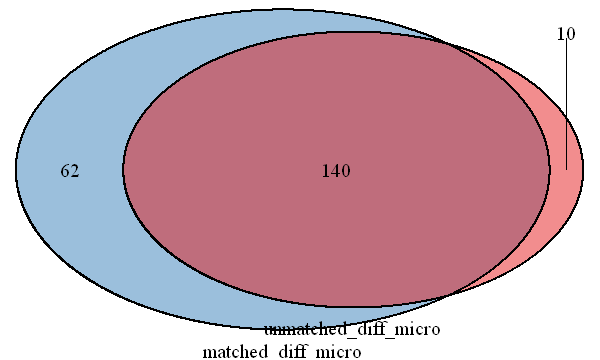

In [7]:
options(repr.plot.width=5,repr.plot.height=3)
draw.pairwise.venn(
  area1 = 150,
  area2 = 202,
  cross.area = 140,
  category = c("unmatched_diff_micro", "matched_diff_micro"),
  fill = brewer.pal(7, "Set1")[1:2],
  cat.pos = c(0, 0)
)

In [8]:
microPResult<-read.csv("Temp/microChange.csv") 
label<-read.csv("Temp/label.csv")
colnames(label)
table(label$phylum)
data<-cbind(microPResult,label)
a<-which(data$unmatched_p.value<0.05)
b<-which(data$p.value<0.05)
c<-intersect(a,b)
data$group="Unmatched"
data$group[b]="Matched"
data$group[c]="Both"
data<-data[-which(abs(data$p.value)<0.01),]
head(data)

[1] "phylum"   "class"    "genus"    "species"  "preStudy"


 Actinobacteria   Bacteroidetes   Euryarchaeota      Firmicutes    Fusobacteria 
             33              38               1             184               1 
 Proteobacteria Verrucomicrobia 
             21               1 

,variable,unmatched_statistic,unmatched_p.value,statistic,p.value,Pchange,phylum,class,genus,species,preStudy,group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
3,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Flavonifractor.s__Flavonifractor_plautii,-6.64704086,3.820000e-11,-0.1763317,0.86005684,0.8600568,Firmicutes,Clostridia,Flavonifractor,Flavonifractor_plautii,0,Unmatched
5,k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Streptococcaceae.g__Streptococcus.s__Streptococcus_sanguinis,-0.06761007,9.461078e-01,-1.6697652,0.09512339,-0.8509844,Firmicutes,Bacilli,Streptococcus,Streptococcus_sanguinis,0,Unmatched
6,k__Bacteria.p__Firmicutes.c__Erysipelotrichia.o__Erysipelotrichales.f__Erysipelotrichaceae.g__Dielma.s__Dielma_fastidiosa,-2.44482631,1.456405e-02,0.2104174,0.83336546,0.8188014,Firmicutes,Erysipelotrichia,Dielma,Dielma_fastidiosa,0,Unmatched
7,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides_finegoldii,0.22977884,8.182914e-01,2.0056582,0.04503070,-0.7732607,Bacteroidetes,Bacteroidia,Bacteroides,Bacteroides_finegoldii,0,Matched
9,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__Clostridium.s__Clostridium_sp_CAG_678,-0.34864903,7.273989e-01,2.3729621,0.01781677,-0.7095821,Firmicutes,Clostridia,Clostridium,Clostridium_sp_CAG_678,0,Matched
10,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_unclassified.g__Monoglobus.s__Monoglobus_pectinilyticus,-0.37534862,7.074462e-01,-2.2100152,0.02717699,-0.6802692,Firmicutes,Clostridia,Monoglobus,Monoglobus_pectinilyticus,0,Matched


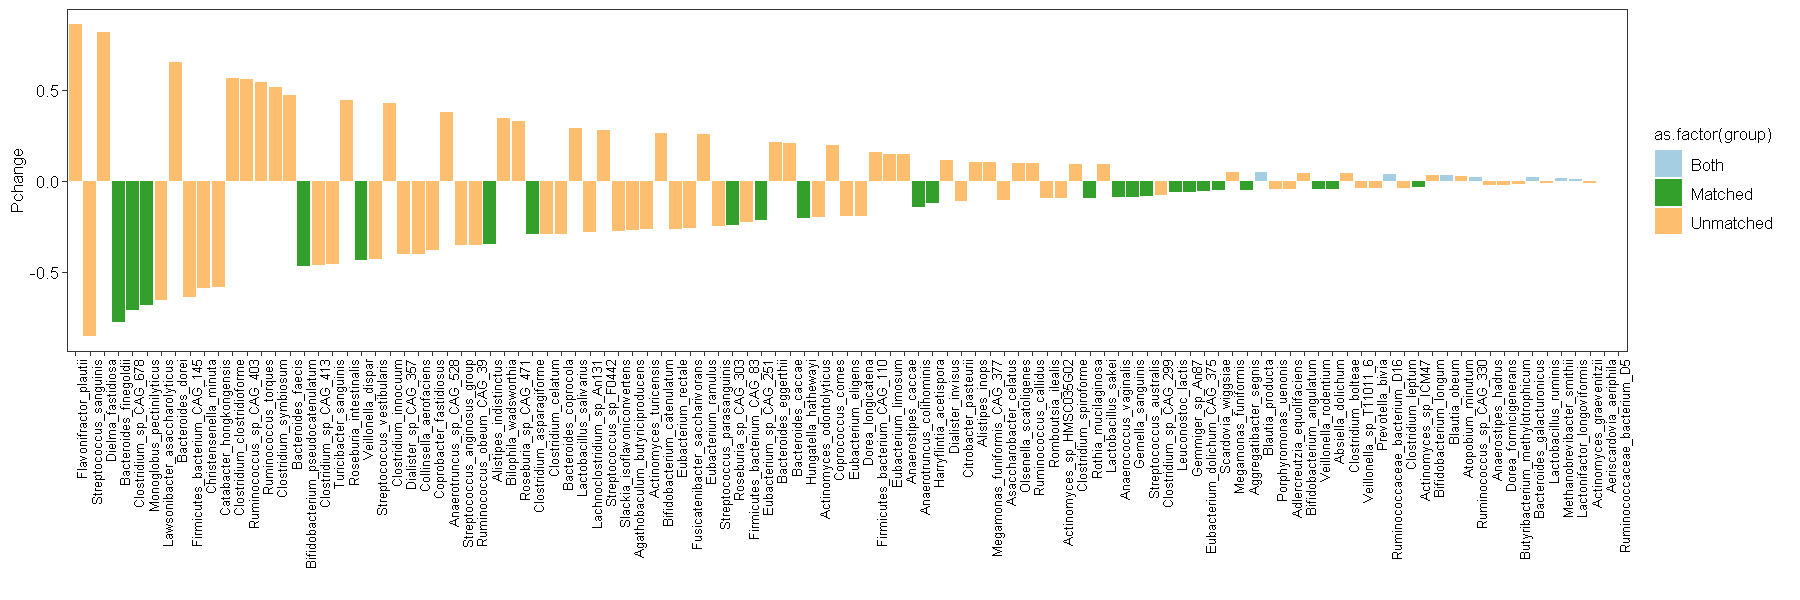

In [9]:
options(repr.plot.width=15,repr.plot.height=5)
p<-ggplot(data, 
       aes(x=reorder(species,abs(Pchange),decreasing =T), y=Pchange)) +
      geom_col(aes(fill = as.factor(group)))+
      scale_fill_manual(values =c("#A6CEE3","#33A02C","#FDBF6F"))+
      theme_bw()+ 
      theme(axis.text.x=element_text(hjust = 1,colour="black",size=8,angle = 90), 
            axis.text.y=element_text(size=10,colour="black"), 
            axis.title.y=element_text(size = 10,colour="black"), 
            legend.text=element_text(colour="black",  
                                     size=10),
            legend.title=element_text(colour="black", 
                                      size=10),
            panel.grid.major = element_blank(),   
            panel.grid.minor = element_blank())+
      ylab("Pchange")+xlab("")
p
#pdf("./Results/Results3/5.3 pchange.pdf",width = 15,height = 5)
#p
#dev.off()